In [5]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv("FastagFraudDetection.csv")

In [7]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [8]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [9]:
df.shape

(5000, 13)

In [10]:
df.duplicated().sum()

0

In [11]:
df.Fraud_indicator.value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(4451, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         4451 non-null   int64 
 1   Timestamp              4451 non-null   object
 2   Vehicle_Type           4451 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            4451 non-null   object
 5   Lane_Type              4451 non-null   object
 6   Vehicle_Dimensions     4451 non-null   object
 7   Transaction_Amount     4451 non-null   int64 
 8   Amount_paid            4451 non-null   int64 
 9   Geographical_Location  4451 non-null   object
 10  Vehicle_Speed          4451 non-null   int64 
 11  Vehicle_Plate_Number   4451 non-null   object
 12  Fraud_indicator        4451 non-null   object
dtypes: int64(4), object(9)
memory usage: 486.8+ KB


c:\Users\Sahil Aggarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sahil Aggarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sahil Aggarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sahil Aggarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

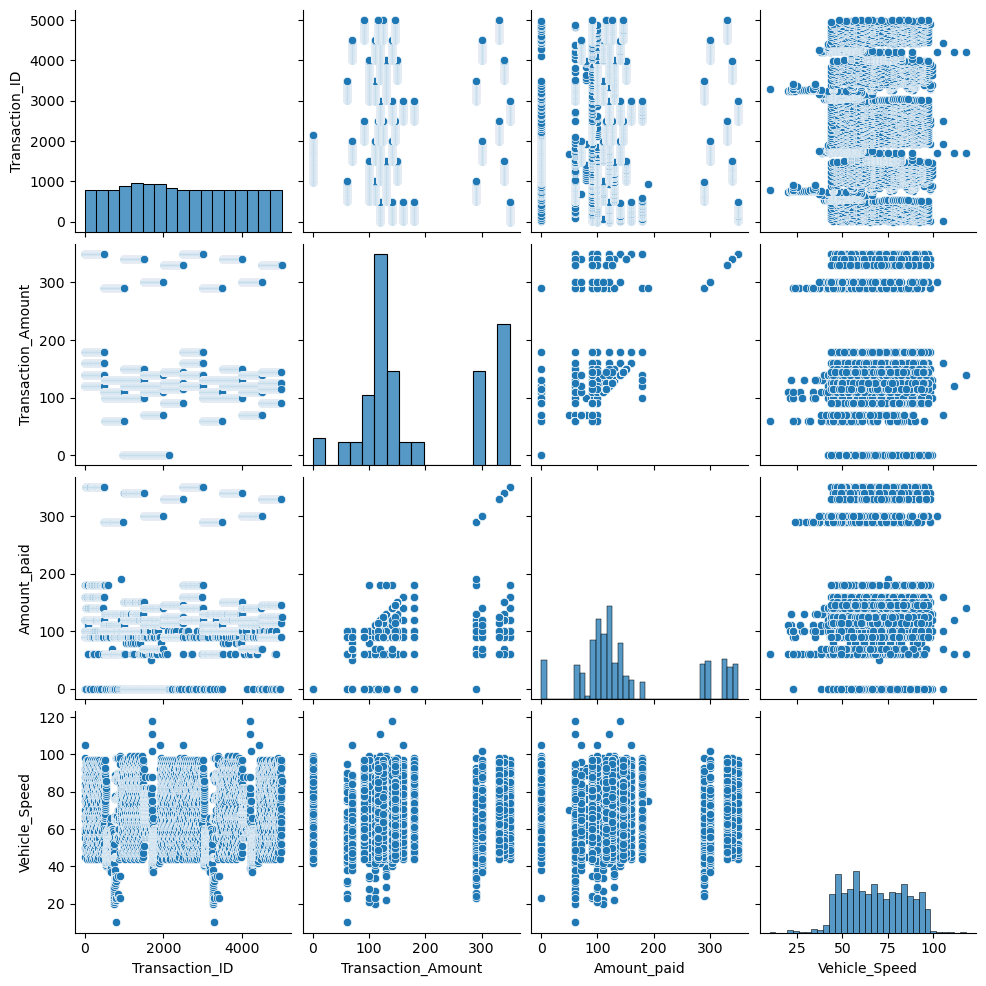

In [15]:
sb.pairplot(df)

c:\Users\Sahil Aggarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sahil Aggarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sahil Aggarwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Fraud_indicator', ylabel='count'>

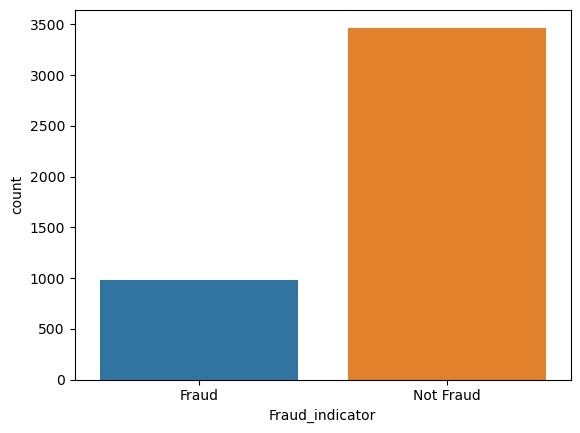

In [16]:
sb.countplot(df,x='Fraud_indicator')

In [17]:
df['Vehicle_Type'].unique()

array(['Bus ', 'Car', 'Truck', 'Van', 'Sedan', 'SUV', 'Motorcycle'],
      dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
x = df.drop(['Transaction_ID',"FastagID","TollBoothID","Geographical_Location","Vehicle_Plate_Number","Fraud_indicator","Timestamp","Vehicle_Type",	"Lane_Type", "Vehicle_Dimensions"],axis=1)

In [20]:
vehicle_dummy = pd.get_dummies(df['Vehicle_Type'])
vehicle_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Bus         4451 non-null   bool 
 1   Car         4451 non-null   bool 
 2   Motorcycle  4451 non-null   bool 
 3   SUV         4451 non-null   bool 
 4   Sedan       4451 non-null   bool 
 5   Truck       4451 non-null   bool 
 6   Van         4451 non-null   bool 
dtypes: bool(7)
memory usage: 65.2 KB


In [22]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud


In [23]:
x.head()

,Transaction_Amount,Amount_paid,Vehicle_Speed
0,350,120,65
1,120,100,78
3,350,120,92
4,140,100,60
5,160,100,105


In [24]:
lane_dummy= pd.get_dummies(df['Lane_Type'])

In [25]:
dimension_dummy=pd.get_dummies(df['Vehicle_Dimensions'])

In [26]:
concated= pd.concat([vehicle_dummy,lane_dummy,dimension_dummy],axis=1)

In [27]:
concated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Bus         4451 non-null   bool 
 1   Car         4451 non-null   bool 
 2   Motorcycle  4451 non-null   bool 
 3   SUV         4451 non-null   bool 
 4   Sedan       4451 non-null   bool 
 5   Truck       4451 non-null   bool 
 6   Van         4451 non-null   bool 
 7   Express     4451 non-null   bool 
 8   Regular     4451 non-null   bool 
 9   Large       4451 non-null   bool 
 10  Medium      4451 non-null   bool 
 11  Small       4451 non-null   bool 
dtypes: bool(12)
memory usage: 86.9 KB


In [28]:
concated.head()

,Bus,Car,Motorcycle,SUV,Sedan,Truck,Van,Express,Regular,Large,Medium,Small
0,True,False,False,False,False,False,False,True,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,False,True
3,False,False,False,False,False,True,False,False,True,True,False,False
4,False,False,False,False,False,False,True,True,False,False,True,False
5,False,False,False,False,True,False,False,False,True,False,True,False


In [29]:
x= pd.concat([x,concated],axis=1)

In [30]:
y=df['Fraud_indicator']
y.head()

0    Fraud
1    Fraud
3    Fraud
4    Fraud
5    Fraud
Name: Fraud_indicator, dtype: object

In [31]:
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=42,shuffle=True,test_size=.2)

In [32]:
clf= RandomForestClassifier()
clf

RandomForestClassifier()

In [33]:
clf.fit(x_train.values,y_train.values)

RandomForestClassifier()

In [34]:
pred =clf.predict(x_test.values)

In [35]:
pred

array(['Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud',
       'Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not 

In [37]:
actual_r = y_test.values

In [38]:
a=0 
for i in range(len(actual_r)):
    if actual_r[i]==pred[i]:
        a+=1
a

889

In [39]:
conf= confusion_matrix(actual_r,pred)
conf

array([[190,   2],
       [  0, 699]], dtype=int64)

<Axes: >

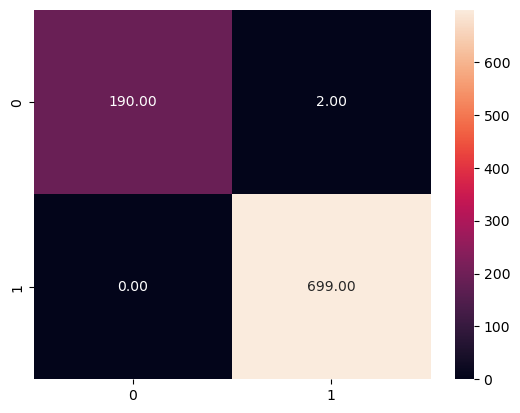

In [40]:
sb.heatmap(conf,annot=True ,fmt='.2f')

In [53]:
accuracy = accuracy_score(actual_r,pred)*100
accuracy
non_acc= (1-accuracy)*100
non_acc

0.002244668911335568

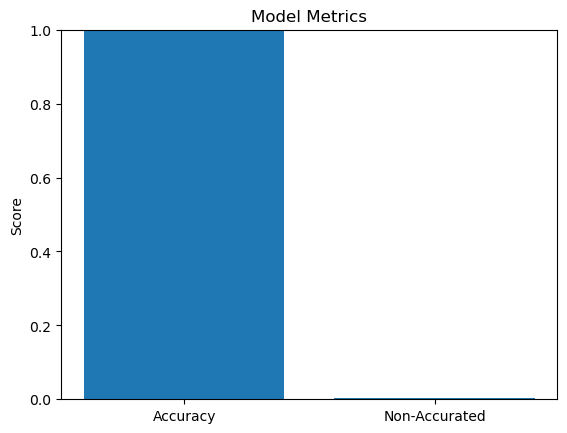

In [55]:
metrics = ['Accuracy', 'Non-Accurated']
values = [accuracy,non_acc]

plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1)  
plt.show()
